In [72]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours,  \
                                    RepeatedEditedNearestNeighbours, AllKNN, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, precision_score, f1_score 
from imblearn.combine import SMOTETomek, SMOTEENN

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
data = pd.read_csv('./datasets/BankChurners.csv')
data = data.iloc[:,1:21]
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [74]:
object_columns = data.select_dtypes('object').columns
for i in object_columns:
    lb = LabelEncoder()
    lb.fit(data[i])
    data[i] = lb.transform(data[i])
    print(f'category : {np.unique(data[i])}\nclasses : {lb.classes_}\n')

input = data.iloc[:,1:]
target = data.iloc[:,0]

category : [0 1]
classes : ['Attrited Customer' 'Existing Customer']

category : [0 1]
classes : ['F' 'M']

category : [0 1 2 3 4 5 6]
classes : ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']

category : [0 1 2 3]
classes : ['Divorced' 'Married' 'Single' 'Unknown']

category : [0 1 2 3 4 5]
classes : ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']

category : [0 1 2 3]
classes : ['Blue' 'Gold' 'Platinum' 'Silver']



accuracy : 0.8761105626850938
roc : 0.6816502961806998
              precision    recall  f1-score   support

    Attrited       0.71      0.39      0.51       327
    Existing       0.89      0.97      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.80      0.68      0.72      2026
weighted avg       0.86      0.88      0.86      2026



c:\프로그램\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


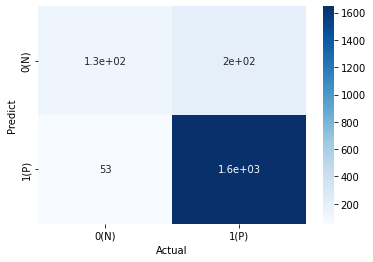

In [78]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
print(f'accuracy : {acc}\nroc : {roc}')
print(classification_report(y_test, pred, target_names=['Attrited', 'Existing']))

## Confusion Matrix
### https://lovelydiary.tistory.com/363
cm = confusion_matrix(y_test, pred)
cmdf = pd.DataFrame(cm, index=['Actual(N)', 'Actual(P)'], columns=['Predict(N)', 'Predict(P)'])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

After Standard Scaler
accuracy : 0.9022704837117473
roc : 0.7602205290753871
              precision    recall  f1-score   support

    Attrited       0.78      0.55      0.65       327
    Existing       0.92      0.97      0.94      1699

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026



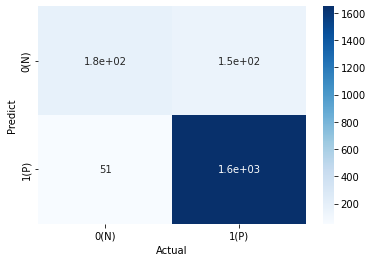

In [73]:
## After Standard Scaler
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

lg = LogisticRegression()
lg.fit(x_train_ss, y_train)
pred = lg.predict(x_test_ss)
acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
print('After Standard Scaler')
print(f'accuracy : {acc}\nroc : {roc}')
print(classification_report(y_test, pred, target_names=['Attrited', 'Existing']))

## Confusion Matrix
### https://lovelydiary.tistory.com/363
cm = confusion_matrix(y_test, pred)
cmdf = pd.DataFrame(cm, index=['Actual(N)', 'Actual(P)'], columns=['Predict(N)', 'Predict(P)'])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

(13602, 19) (13602,)


After Standard Scaler, SMOTE
accuracy : 0.8558736426456071
roc : 0.8412161858117655

              precision    recall  f1-score   support

    Attrited       0.53      0.82      0.65       327
    Existing       0.96      0.86      0.91      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026



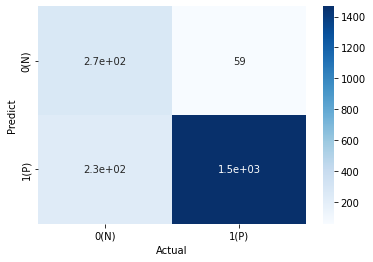

In [74]:
## After Standard Scaler, SMOTE

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

smote = SMOTE(random_state=42)
x_train_ss, y_train = smote.fit_resample(x_train_ss, y_train)
print(x_train_ss.shape, y_train.shape)
print('\n')

lg = LogisticRegression()
lg.fit(x_train_ss, y_train)
pred = lg.predict(x_test_ss)
acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
print('After Standard Scaler, SMOTE')
print(f'accuracy : {acc}\nroc : {roc}\n')
print(classification_report(y_test, pred, target_names=['Attrited', 'Existing']))

## Confusion Matrix
### https://lovelydiary.tistory.com/363
cm = confusion_matrix(y_test, pred)
cmdf = pd.DataFrame(cm, index=['Actual(N)', 'Actual(P)'], columns=['Predict(N)', 'Predict(P)'])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

(13735, 19) (13735,)


After Standard Scaler, ADASYN
accuracy : 0.8267522211253702
roc : 0.8399049269852926

              precision    recall  f1-score   support

    Attrited       0.48      0.86      0.62       327
    Existing       0.97      0.82      0.89      1699

    accuracy                           0.83      2026
   macro avg       0.72      0.84      0.75      2026
weighted avg       0.89      0.83      0.84      2026



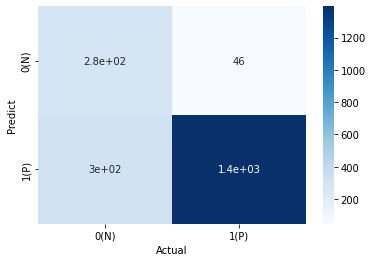

In [75]:
## After Standard Scaler, ADASYN

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

adasyn = ADASYN(random_state=42)
x_train_ss, y_train = adasyn.fit_resample(x_train_ss, y_train)
print(x_train_ss.shape, y_train.shape)
print('\n')

lg = LogisticRegression()
lg.fit(x_train_ss, y_train)
pred = lg.predict(x_test_ss)
acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
print('After Standard Scaler, ADASYN')
print(f'accuracy : {acc}\nroc : {roc}\n')
print(classification_report(y_test, pred, target_names=['Attrited', 'Existing']))

## Confusion Matrix
### https://lovelydiary.tistory.com/363
cm = confusion_matrix(y_test, pred)
cmdf = pd.DataFrame(cm, index=['Actual(N)', 'Actual(P)'], columns=['Predict(N)', 'Predict(P)'])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

(13598, 19) (13598,)


After Standard Scaler, SMOTETomek
accuracy : 0.8563672260612043
roc : 0.8415104765710357

              precision    recall  f1-score   support

    Attrited       0.54      0.82      0.65       327
    Existing       0.96      0.86      0.91      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026



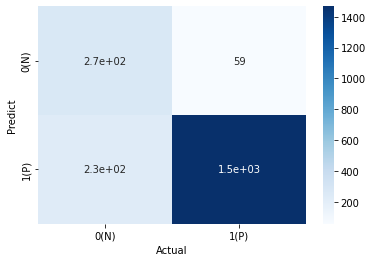

In [76]:
## After Standard Scaler, SMOTETomek

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

smoteto = SMOTETomek(random_state=42)
x_train_ss, y_train = smoteto.fit_resample(x_train_ss, y_train)
print(x_train_ss.shape, y_train.shape)
print('\n')


lg = LogisticRegression()
lg.fit(x_train_ss, y_train)
pred = lg.predict(x_test_ss)
acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)
print('After Standard Scaler, SMOTETomek')
print(f'accuracy : {acc}\nroc : {roc}\n')
print(classification_report(y_test, pred, target_names=['Attrited', 'Existing']))

## Confusion Matrix
### https://lovelydiary.tistory.com/363
cm = confusion_matrix(y_test, pred)
cmdf = pd.DataFrame(cm, index=['Actual(N)', 'Actual(P)'], columns=['Predict(N)', 'Predict(P)'])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()

In [92]:
columns = ['accuracy', 'recall', 'precision', 'f1_score']
df = pd.DataFrame(columns=columns)

sampling = [EditedNearestNeighbours,RepeatedEditedNearestNeighbours, AllKNN, NearMiss,NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks, SMOTE, BorderlineSMOTE, ADASYN, SMOTETomek, SMOTEENN]

for i in sampling:
    x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

    ss = StandardScaler()
    x_train_ss = ss.fit_transform(x_train)
    x_test_ss = ss.fit_transform(x_test)
    sampling = i()
    x_train_ss, y_train = sampling.fit_resample(x_train_ss, y_train)

    lg = LogisticRegression(random_state=42)
    lg.fit(x_train_ss, y_train)
    pred = lg.predict(x_test_ss)
    acc = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    df.loc[sampling] = [acc, recall, precision, f1]

print("Logistic Model's score by sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False)

Logistic Model's score by sampling


,accuracy,recall,precision,f1_score
OneSidedSelection(),0.901777,0.965862,0.920875,0.942833
TomekLinks(),0.901777,0.965862,0.920875,0.942833
NeighbourhoodCleaningRule(),0.899803,0.949382,0.932370,0.940799
EditedNearestNeighbours(),0.896347,0.940553,0.936145,0.938344
AllKNN(),0.891905,0.932902,0.937870,0.935379
RepeatedEditedNearestNeighbours(),0.890918,0.927016,0.941986,0.934441
SMOTE(),0.853406,0.859329,0.961792,0.907678
SMOTETomek(),0.851925,0.858152,0.961107,0.906716
BorderlineSMOTE(),0.832182,0.828723,0.966369,0.892269
ADASYN(),0.826259,0.820483,0.967384,0.887898
